# Re-produce economic model fig

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.facecolor'] = 'white'

# 自定义配色
nature_colors = {
    'NS': "#c83c1c",
    'Nature': "#29303c",
    'NCC': "#0889a6",
    'NC': "#f1801f",
    'NG': "#006c43",
    'NHB': "#1951A0",
    'NEE': "#C7D530"
}

## 边际收益函数

In [2]:
def du(x, A):
    return A/(x+1)

def future_benefit(x1, Q, x, N, A):
    return du(Q*x/(x+(N-1)*x1), A) * Q * (N-1) * x1 / ((x+(N-1)*x1) * (x + (N-1)*x1))

def optimal_f3(x, f3):
    abs_f3 = abs(f3)
    return x[abs_f3 == min(abs_f3)][0]

## 参数

In [3]:
beta = 0.7
N = 8
C = 0.5
x1 = 15
Q = 8
T = 5  # Fig. 1B 才用
C_policy = 0
A = 1

## Fig. 1

In [4]:
# 使用图片的比例来定位
def get_position_by_ratio(ax, x_ratio, y_ratio):
    """
    使用图片的比例来返回定位，从而更好的控制说明文字的位置
    ax: 一个 matplotlib 的画图轴对象
    x_ratio: 横坐标的比例位置
    y_ratio: 纵坐标的比例位置
    """
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    x = (x_max-x_min) * x_ratio + x_min
    y = (y_max-y_min) * y_ratio + y_min
    return x, y

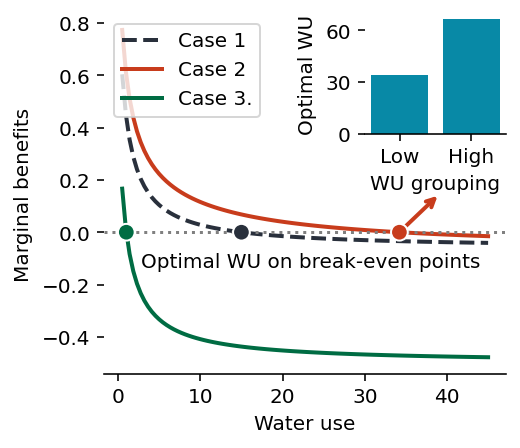

In [14]:
### Fig. 1A

x = np.linspace(0.5, 45, 100)
f1 = du(x, A) - C  # case1 before 87
f2 = du(x, A) - C / N  # after 98
f3 = du(x, A) - C/N + beta/(1-beta) * future_benefit(x1, Q, x, N, A)  # 87-98
xplot3 = optimal_f3(x, f3)

x_h = np.linspace(30, 75, 100)
f3_h = du(x_h, 2) - C/N + beta/(1-beta) * future_benefit(x1, Q, x_h, N, 2)  # 87-98
xplot3_h = optimal_f3(x_h, f3_h)

fig, ax1 = plt.subplots(figsize=(3.5, 3), constrained_layout=True)
# height = [1, 5, 5]
# gs = fig.add_gridspec(ncols=1, nrows=3, height_ratios=height, hspace=0.0)
# ax1 = fig.add_subplot(gs[1])
ax = fig.add_subplot(333)

ax.bar([1, 2], [xplot3, xplot3_h], color=nature_colors['NCC'])
ax.set_xticks(range(1, 3, 1))
ax.set_xticklabels(['Low', 'High'])
ax.set_xlabel("WU grouping")
ax.set_ylabel("Optimal WU")
ax.set_yticks(range(0, 80, 30))
for ax in [ax, ax1]:
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)

lw = 2
ax1.annotate(
    xy=(xplot3, 0), 
    xytext=(xplot3+5, 0.15), 
    text="", 
    color='black', 
    style='italic', 
    horizontalalignment='right', 
    arrowprops=dict(edgecolor=nature_colors['NS'], lw=lw, facecolor=nature_colors['NS'], arrowstyle="<-"),
    zorder=0
)

labels = ['Case 1', 'Case 2', 'Case 3.']
colors = [nature_colors['Nature'], nature_colors['NS'], nature_colors['NG']]
lss = ['--', "-", "-"]
for i, f in enumerate((f2, f3, f1)):
    ax.plot(x, f, colors[i], lw=lw, ls=lss[i], label=labels[i], zorder=1)

fig.text(0.6, 0.4, 'Optimal WU on break-even points', horizontalalignment='center')
ax1.axhline(0, ls=':', color='gray')
points_colors = [nature_colors['NG'], nature_colors['Nature'], nature_colors['NS']]
ax1.scatter([1, 15, xplot3], [0, 0, 0], marker="o", edgecolor='white', s=70, alpha=1, color=points_colors, zorder=2)
ax1.legend(loc=2)
ax1.set_xlabel("Water use")
ax1.set_ylabel("Marginal benefits")
plt.savefig("../figs/outputs/economic_model.pdf", format='pdf')
plt.show();

<BarContainer object of 2 artists>

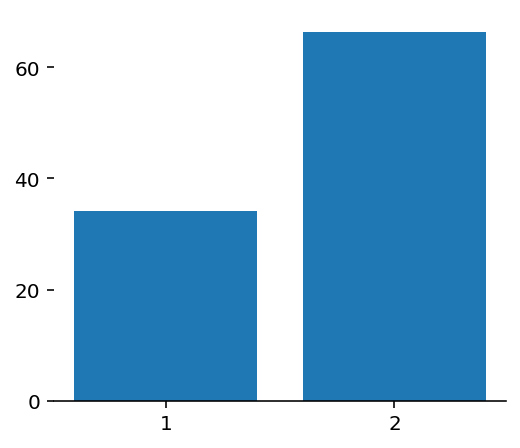

In [6]:
fig, ax = plt.subplots(figsize=(3.5, 3), constrained_layout=True)
ax.bar([1, 2], [xplot3, xplot3_h])
ax.set_xticks(range(1, 3, 1))
ax.set_yticks(range(0, 80, 20))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)

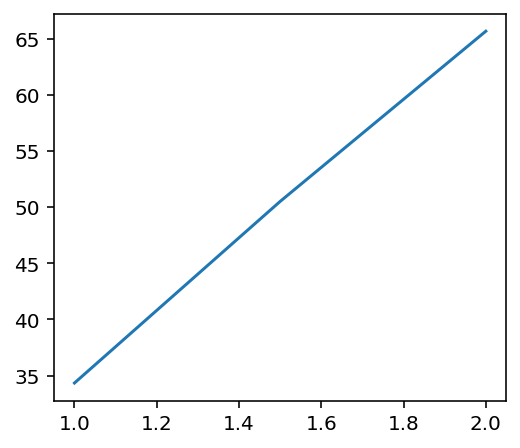

In [7]:
fig, ax1 = plt.subplots(figsize=(3.5, 3), constrained_layout=True)
x = np.linspace(0, 100, 100)
alpha = np.linspace(1, 2, 3)
As = []
for a in alpha:
    f3 = du(x, a) - C/N + beta/(1-beta) * future_benefit(x1, Q, x, N, a)  # 87-98
    abs_f3 = abs(f3)
    xplot3 = x[abs_f3 == min(abs_f3)][0]
    As.append(xplot3)
ax1.plot(alpha, As)